In [2]:
import json
import sys
import string
import nltk
import goose
from pprint import pprint
import collections
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import shlex, subprocess
from operator import *

In [3]:
# Total number of data entry in one file
with open('2015_04_12_17_15_19.json') as file: 
    for i, l in enumerate(file):
        pass
    print i+1
    file.close()

32089


In [14]:
# Initialize a list of mentioned in tweets
mentions = []
count = []

tags = []
count_tag = []

locations = []
count_location = []

users = []
count_user = []

fav_tweet = []
count_fav = []

with open('../2015_04_12_17_15_19.json') as file:
    for i, line in enumerate(file):
    # print the structure of the data
        l = json.loads(line)
        # print json.dumps(l, indent = 4, sort_keys = True)
        try:
            # The person get mentioned
            mention = l['entities']['user_mentions'][0]['screen_name']
            # The hashtag in the tweet
            hashtag = l['entities']['hashtags']
            hash_ = []
            for i in hashtag:
                hash_.append(i['text'])
            # The location of the user who tweeted
            loca = l['user']['location']
            # The name of the user
            person = l['user']['screen_name']
            # The user's description
            description = l['user']['description']
            # The most re-tweeted tweet by the majority
            tweet = l['retweeted_status']['text']
        except:
            mention = ''
            loca = ''
            person = ''
            description = ''
            tweet = ''
        if mention != '':
            mentions.append(mention)
        if len(hash_) != 0:
            tags += hash_
        if loca != '':
            locations.append(loca)
        if person != '':
            users.append(person)
        if tweet != '':
            fav_tweet.append(tweet)
    
    # Counter of the most mentioned user
    count = collections.Counter(mentions).most_common(10)
    # Count of the most common hashtag
    count_tag = collections.Counter(tags).most_common(15)
    count_location = collections.Counter(locations).most_common(10)
    count_user = collections.Counter(users).most_common(10)
    count_fav = collections.Counter(fav_tweet).most_common(10)
    

[(u'WhyImNotVotingForHillary', 2366), (u'HillarysBigAnnouncement', 1567), (u'HillaryClinton', 1099), (u'Hillary2016', 1022), (u'ReadyForHillary', 984), (u'Hillary', 770), (u'Benghazi', 630), (u'tcot', 621), (u'StopHillary', 332), (u'AmyPoehler', 285), (u'TinaFey', 285), (u'BitchesGetStuffDone', 285), (u'p2', 280), (u'libertynothillary', 277), (u'WakeUpAmerica', 270)]


In [16]:
# The count of the most mentioned user
count

[(u'washingtonpost', 459),
 (u'RandPaul', 352),
 (u'CNNPolitics', 338),
 (u'NoToFeminism', 217),
 (u'akdahling', 194),
 (u'smrtgrls', 185),
 (u'homeschoolc8824', 171),
 (u'pari_passu', 165),
 (u'imchriskelly', 160),
 (u'TMGijane', 160)]

In [18]:
# The count of the most common hashtag
count_tag

[(u'WhyImNotVotingForHillary', 2366),
 (u'HillarysBigAnnouncement', 1567),
 (u'HillaryClinton', 1099),
 (u'Hillary2016', 1022),
 (u'ReadyForHillary', 984),
 (u'Hillary', 770),
 (u'Benghazi', 630),
 (u'tcot', 621),
 (u'StopHillary', 332),
 (u'AmyPoehler', 285),
 (u'TinaFey', 285),
 (u'BitchesGetStuffDone', 285),
 (u'p2', 280),
 (u'libertynothillary', 277),
 (u'WakeUpAmerica', 270)]

In [28]:
# The locations where the most tweets took place
count_location

[(u'USA', 111),
 (u'WATCH THIS:', 75),
 (u'Texas', 48),
 (u'Washington, DC', 44),
 (u'New York', 43),
 (u'Colorado', 28),
 (u'New Jersey', 28),
 (u'California', 27),
 (u'Florida', 26),
 (u"Muslim Obama's AmeriKastan", 25)]

In [29]:
# The most active users
count_user

[(u'Lee4DISCLOSURE', 75),
 (u'PatVPeters', 25),
 (u'jennycreamale', 24),
 (u'4thavefreespiri', 24),
 (u'ChristiChat', 24),
 (u'UTHornsRawk', 23),
 (u'idesignwis', 22),
 (u'bluedillygal', 21),
 (u'Nikcela002', 19),
 (u'ConservativeGM', 18)]

In [30]:
# The most re-tweeted tweets by the majority
count_fav

[(u'Things that never get old. #BitchesGetStuffDone #ReadyForHillary @HillaryClinton @smrtgrls #TinaFey #AmyPoehler http://t.co/3Vp2DRTIge',
  194),
 (u'Waiting anxiously for #HillarysBigAnnouncement \U0001f601\u26a1\ufe0f\n\ncc: @HillaryClinton http://t.co/UMP4brzNdq',
  185),
 (u"RT @PolitiBunny: Guess who else won't be voting for Hillary?\n\nStevens\nDoherty\nWoods\nSmith\n\n#WhyImNotVotingForHillary #Benghazi",
  171),
 (u'Limited edition store item: "Hillary\'s hard drive" https://t.co/GAgncz0w7F #libertynothillary',
  167),
 (u'Here are 4 reasons #WhyImNotVotingForHillary\n \n"Did we survive the day?"  http://t.co/Riq8jqAsD3 http://t.co/OQkN202bct',
  149),
 (u'I want nobody named Bush or Clinton anywhere near our national politics for at least 2 generations. #WhyImNotVotingForHillary',
  82),
 (u"Hillary announces surprise bid for Lord Commander of the Night's Watch. #WinterIsComing",
  80),
 (u'\u2192 http://t.co/GxTALNQy6x Hillary Clinton #HillaryClinton Hillary Clinton Set to

In [35]:
def graph_bar(data, name):
    x = np.array(range(len(data)))
    y = np.array(zip(*data)[1])
    xLabel = np.array(list(zip(*data)[0]))
    plt.xticks(x, xLabel, rotation = 45)
    plt.bar(x, y)
    plt.title(name)
    plt.show()

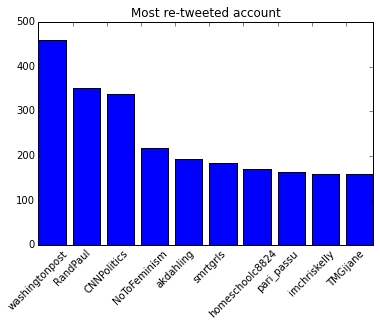

In [36]:
graph_bar(count, 'Most re-tweeted account')

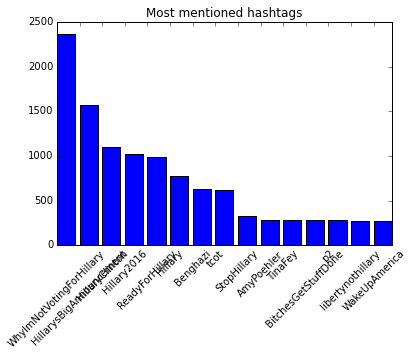

In [37]:
graph_bar(count_tag, 'Most mentioned hashtags')

In [32]:
# below 3 methods counts the total number of tweets and graphs the count distribution by time

In [55]:
def get_count():
    # command_line = raw_input("Please enter your command")
    command_line = 'wc -l ../*.json'
    p = subprocess.Popen(command_line, stdout = subprocess.PIPE, stderr=subprocess.PIPE, shell='True')
    stdout, stderr = p.communicate()
    return stdout

In [59]:
def parse_count(stdout):
    # return the count of tweet per hour in a different data structure
    parsed_out = stdout.split('\n')
    total = parsed_out[-2].strip().split(' ')[0]
    print 'Total number of tweet is : %s' % (total)
    return parsed_out[:-2]

In [70]:
def analyze_count(out, title):
    # Graph the count distribution
    name = []
    count = []
    for i in out:
        element = i.strip().split(' ')
        count.append(int(element[0]))
        name.append(element[1][11:16])
    x = np.array(range(len(name)))
    y = np.array(count)
    x_label = np.array(name)
    plt.figure(figsize=(20,10))
    plt.xticks(x, x_label, rotation = 90)
    plt.bar(x, y)
    plt.title(title)
    plt.show()

Total number of tweet is : 1613955


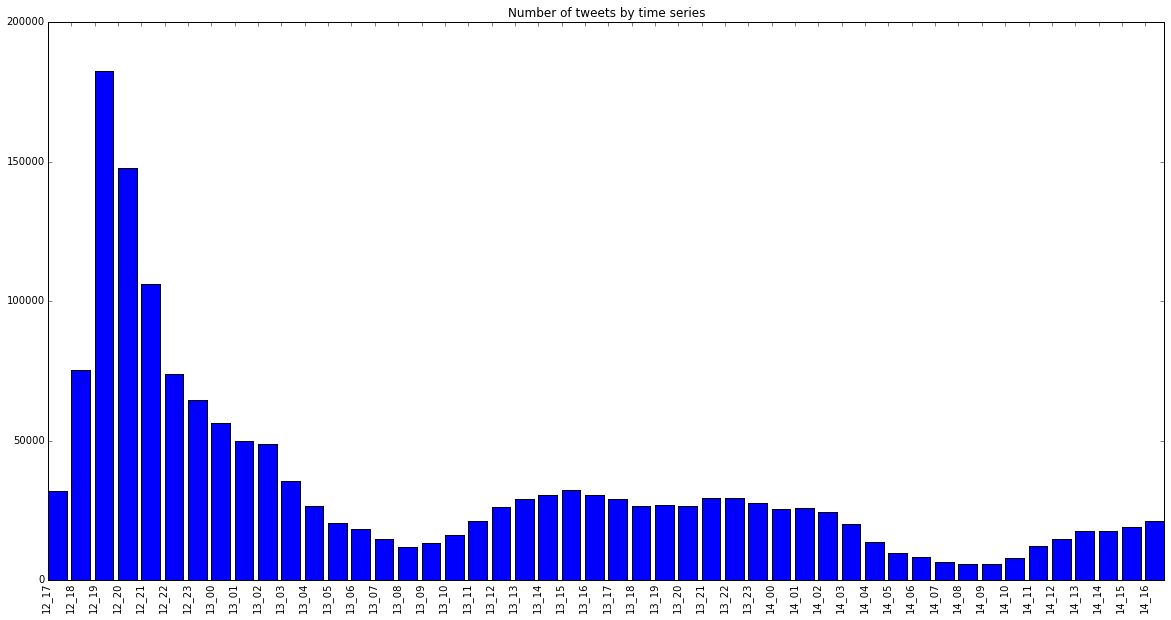

In [71]:
# Visualize the number of tweetw by hour
analyze_count(parse_count(get_count()), 'Number of tweets by time series')

In [19]:
'''with open('2015_04_12_17_15_19.json') as file:
    line = file.readline()
    l = json.loads(line)
    print json.dumps(l, indent = 4, sort_keys = True)
'''

"with open('2015_04_12_17_15_19.json') as file:\n    line = file.readline()\n    l = json.loads(line)\n    print json.dumps(l, indent = 4, sort_keys = True)\n"

In [33]:
# Open the mapreduce output and sort the elements by their individual counts
# inp: input; top: top N you'd like to see
def sortLine(inp, top):
	lines = []
	for line in inp.readlines():
		l = line.strip('\n').split('\t')
		new = (l[:-1][0], int(l[-1]))
		lines.append(new)

	lines_new = sorted(lines, key = itemgetter(1), reverse = True)
	return lines_new[:top]

In [76]:
# Graph the count distribution of mapreduce results
def graphing(data, title):
	name, count = zip(*data)
	x = np.array(range(len(data)))
	y = np.array(count)
	x_label = np.array(name)
	plt.xticks(x, x_label, rotation = 90)
	plt.bar(x, y)
	plt.title(title)
	plt.show()

In [73]:
# Open up the mapreduce results
user = open('./result_user.txt', 'rb')
location = open('./result_loca.txt', 'rb')
hashtag = open('./result_hash.txt', 'rb')
mention = open('./result_mention.txt', 'rb')
tweet = open('./result_tweet.txt', 'rb')

In [74]:
# Obtain the top N results from each field
users_top = sortLine(user, 15)
loca_top = sortLine(location, 10)
hash_top = sortLine(hashtag, 10)
mention_top = sortLine(mention, 15)
tweet_top = sortLine(tweet, 10)

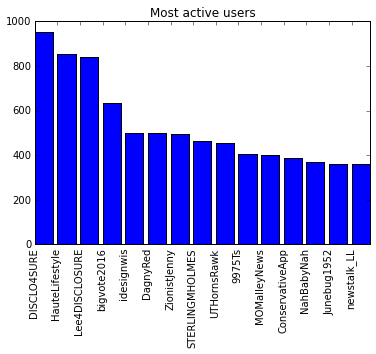

In [82]:
# Most active users in the 48 hour period
graphing(users_top, 'Most active users')

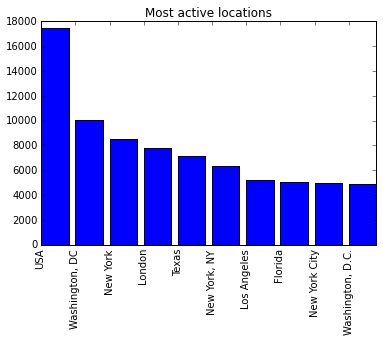

In [78]:
# top 10 locations where the users are the most active
graphing(loca_top, 'Most active locations')

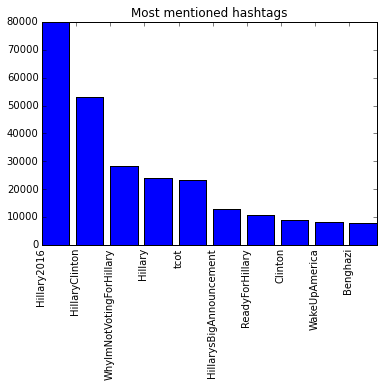

In [79]:
# Most mentioned hashtags in the 48 hour period
graphing(hash_top, 'Most mentioned hashtags')

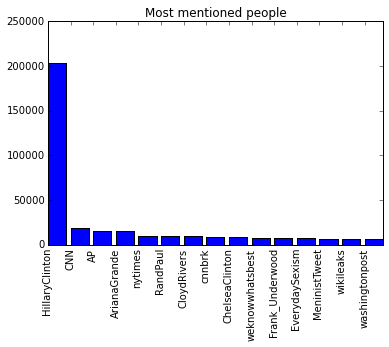

In [80]:
# Top 15 people that are mentioned the most in the 48 hour period
graphing(mention_top, 'Most mentioned people')

In [81]:
# Most re-tweeted tweets in the 48 hour periods
tweet_top

[('yaaas @hillaryclinton', 10235),
 ("BREAKING NEWS: It's official. @HillaryClinton has just announced she is running for president. http://t.co/2mcPLTpliB http://t.co/il3Y8siw6U",
  10192),
 ('BREAKING: Hillary Rodham Clinton enters White House race; Democrat seeks to be first female president.',
  7745),
 ('Very proud of you Mom! @HillaryClinton: http://t.co/PvMlg82cU2', 5069),
 ('favorite - hillary clinton http://t.co/o4RCQzXbxN', 4931),
 ("Hillary Clinton announced she's runnin' for President in 2016. Now millions of Republicans will be sexist instead of racist. Merica.",
  4777),
 ('Bill and Barack go on tour and stunt while their wives run the world.',
  3834),
 ('Clinton is officially running for President - have your #EverydaySexism bingo card to hand #HillaryForAmerica http://t.co/CPpN9Y4k8i',
  3657),
 ('Fav ~ Hillary Clinton http://t.co/neAgnsiflW', 3293),
 ('Road trip! Loaded the van &amp; set off for IA. Met a great family when we stopped this afternoon. Many more to come.

# Oscar Name Count

In [3]:
names = []
counts = []

with open('/Users/Melanie/nyu/fall_2015/DSGA1003/dahlia/oscars/nameCount') as f:
    for line in f.readlines():
        n, c = line.strip().split('\t')
        names.append(n)
        counts.append(int(c))

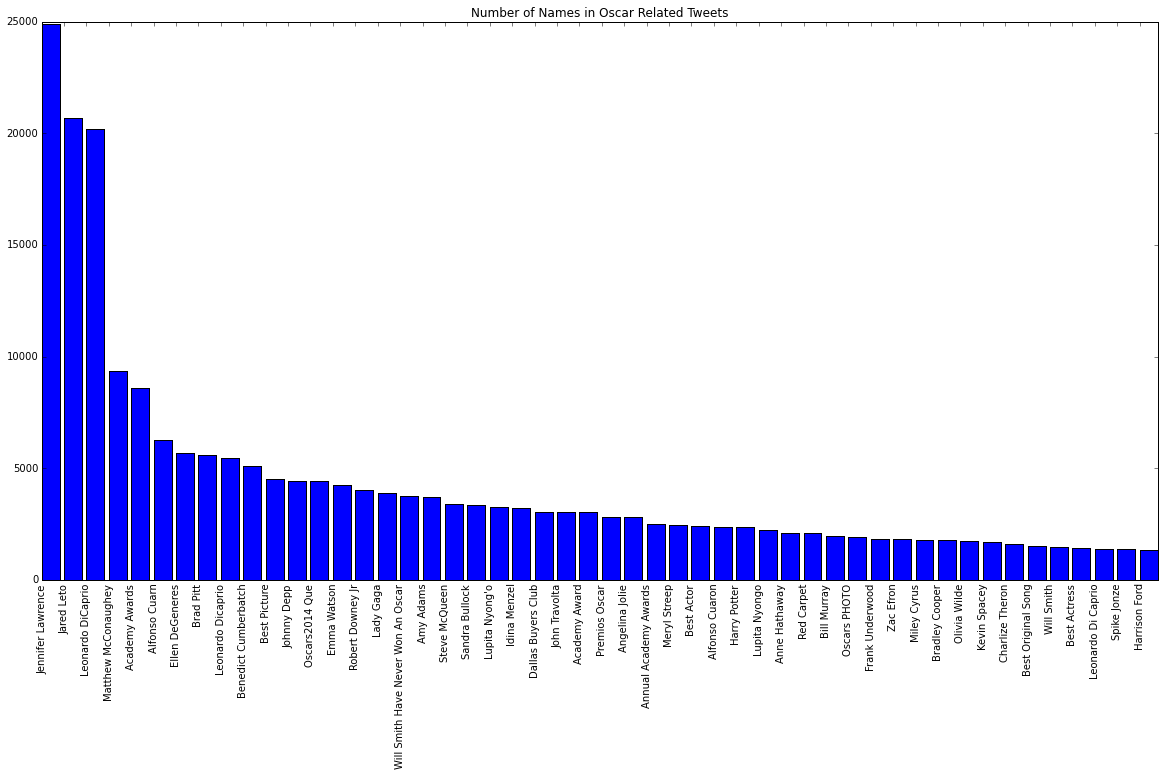

In [9]:
x = np.array(range(50))
y = np.array(counts[:50])
x_label = np.array(names[:50])
plt.figure(figsize=(20,10))
plt.xticks(x, x_label, rotation = 90)
plt.bar(x, y)
plt.title('Number of Names in Oscar Related Tweets')
plt.show()

In [10]:
names[:20]

['Jennifer Lawrence',
 'Jared Leto',
 'Leonardo DiCaprio',
 'Matthew McConaughey',
 'Academy Awards',
 'Alfonso Cuarn',
 'Ellen DeGeneres',
 'Brad Pitt',
 'Leonardo Dicaprio',
 'Benedict Cumberbatch',
 'Best Picture',
 'Johnny Depp',
 'Oscars2014 Que',
 'Emma Watson',
 'Robert Downey Jr',
 'Lady Gaga',
 'Will Smith Have Never Won An Oscar',
 'Amy Adams',
 'Steve McQueen',
 'Sandra Bullock']

In [10]:
counts[:20]

NameError: name 'counts' is not defined